In [1]:
from Learners_Generator import *
import Functions as f
from Enviroment import *
from Clairvoyant import *
from Classes import *
import Plots as p
import warnings
warnings.filterwarnings("ignore")  # Convergence warning concerning the parameters of the GP since we are working with very large values


In [2]:
pricing_arms=[10,15,20,25,30]

advertising_arms=np.linspace(100,397,100)


In [3]:
cl=Classes()





env=Enviroment(5,100,cl)

In [4]:
runs=2
T=365
show_print=True

cum_regret_gpucb_multi=[]
cum_reward_gpucb_multi=[]
istant_regret_gpucb_multi=[]
istant_reward_gpucb_multi=[]

cum_regret_gpts_multi=[]
cum_reward_gpts_multi=[]
istant_regret_gpts_multi=[]
istant_reward_gpts_multi=[]

cum_regret_gpucb_multi_gen=[]
cum_reward_gpucb_multi_gen=[]
istant_regret_gpucb_multi_gen=[]
istant_reward_gpucb_multi_gen=[]

cum_regret_gpts_multi_gen=[]
cum_reward_gpts_multi_gen=[]
istant_regret_gpts_multi_gen=[]
istant_reward_gpts_multi_gen=[]


for r in range(runs):

    gpucb_sum=GPUCB1_TS(advertising_arms)
    gpts_sum=GPTS_TS(advertising_arms)
    gpucb_gen = Learners_Generator(GPUCB1_TS, advertising_arms)
    gpts_gen = Learners_Generator(GPTS_TS, advertising_arms)
    
    clairv_price_1=Clairvoyant_pricing(env , (1,1) ,pricing_arms )
    clairv_bid_1=Clairvoyant_bid(env,(1,1), advertising_arms)
    clairv_price_2=Clairvoyant_pricing(env , (0,1) ,pricing_arms )
    clairv_bid_2=Clairvoyant_bid(env,(0,1), advertising_arms)
    clairv_price_3=Clairvoyant_pricing(env , (0,0) ,pricing_arms )
    clairv_bid_3=Clairvoyant_bid(env,(0,0), advertising_arms)

    opt_price_1=clairv_price_1.optimal_arm()
    opt_price_2=clairv_price_2.optimal_arm()
    opt_price_3=clairv_price_3.optimal_arm()

    opt_bid_1=clairv_bid_1.optimal_arm(opt_price_1)
    opt_bid_2=clairv_bid_2.optimal_arm(opt_price_2)
    opt_bid_3=clairv_bid_3.optimal_arm(opt_price_3)

    expected_optimal_rew1=clairv_bid_1.expected_reward(opt_bid_1,opt_price_1)
    expected_optimal_rew2=clairv_bid_2.expected_reward(opt_bid_2,opt_price_2)
    expected_optimal_rew3=clairv_bid_3.expected_reward(opt_bid_3,opt_price_3)
    expected_optimal_rew_sum = expected_optimal_rew1 + expected_optimal_rew2 + expected_optimal_rew3

    if show_print:
        print(opt_price_1, opt_price_2 ,opt_price_3)
        print(opt_bid_1 , opt_bid_2 , opt_bid_3)
        print(expected_optimal_rew1,expected_optimal_rew2,expected_optimal_rew3)



    cum_reward_GPUCB=[0]
    cum_reward_GPTS=[0]
    cum_reward_gen_GPUCB=[0]
    cum_reward_gen_GPTS=[0]

    cumulative_optimal_rew_sum=[0]

    cum_regret_GPUCB=[]
    cum_regret_GPTS=[]
    cum_regret_gen_GPUCB=[]
    cum_regret_gen_GPTS=[]

    regret_GPUCB=np.zeros(T)+expected_optimal_rew_sum
    regret_GPTS=np.zeros(T)+expected_optimal_rew_sum
    regret_gen_GPUCB=np.zeros(T)+expected_optimal_rew_sum
    regret_gen_GPTS=np.zeros(T)+expected_optimal_rew_sum

    reward_GPUCB=[]
    reward_GPTS=[]
    reward_gen_GPUCB=[]
    reward_gen_GPTS=[]



    for t in range(T):

        cumulative_optimal_rew_sum.append(cumulative_optimal_rew_sum[t]+expected_optimal_rew_sum)

        pulled_arm_price_GPUCB, pulled_arm_bid_GPUCB=gpucb_sum.pull_arm()
        rewards_GPUCB=env.round([pulled_arm_price_GPUCB, pulled_arm_price_GPUCB, pulled_arm_price_GPUCB], [pulled_arm_bid_GPUCB, pulled_arm_bid_GPUCB, pulled_arm_bid_GPUCB])
        conversion_total = rewards_GPUCB[(1,1)][0] + rewards_GPUCB[(0,1)][0] + rewards_GPUCB[(0,0)][0]
        n_clicks = rewards_GPUCB[(1,1)][1] + rewards_GPUCB[(0,1)][1] + rewards_GPUCB[(0,0)][1]
        cum_cost = rewards_GPUCB[(1,1)][2] + rewards_GPUCB[(0,1)][2] + rewards_GPUCB[(0,0)][2]
        reward_tot = rewards_GPUCB[(1,1)][3] + rewards_GPUCB[(0,1)][3] + rewards_GPUCB[(0,0)][3]
        gpucb_sum.update(pulled_arm_price_GPUCB, pulled_arm_bid_GPUCB , [conversion_total, n_clicks, cum_cost, reward_tot])
    
        cum_reward_GPUCB.append(cum_reward_GPUCB[t]+reward_tot)
        cum_regret_GPUCB.append(cumulative_optimal_rew_sum[t+1]-cum_reward_GPUCB[t+1])
        regret_GPUCB[t]=regret_GPUCB[t]-reward_tot
        reward_GPUCB.append(reward_tot)


        pulled_arm_price_GPTS, pulled_arm_bid_GPTS = gpts_sum.pull_arm()
        rewards_GPTS=env.round([pulled_arm_price_GPTS, pulled_arm_price_GPTS, pulled_arm_price_GPTS], [pulled_arm_bid_GPTS, pulled_arm_bid_GPTS, pulled_arm_bid_GPTS])
        conversion_total = rewards_GPTS[(1,1)][0] + rewards_GPTS[(0,1)][0] + rewards_GPTS[(0,0)][0]
        n_clicks = rewards_GPTS[(1,1)][1] + rewards_GPTS[(0,1)][1] + rewards_GPTS[(0,0)][1]
        cum_cost = rewards_GPTS[(1,1)][2] + rewards_GPTS[(0,1)][2] + rewards_GPTS[(0,0)][2]
        reward_tot = rewards_GPTS[(1,1)][3] + rewards_GPTS[(0,1)][3] + rewards_GPTS[(0,0)][3]
        gpts_sum.update(pulled_arm_price_GPTS, pulled_arm_bid_GPTS , [conversion_total, n_clicks, cum_cost, reward_tot])

        cum_reward_GPTS.append(cum_reward_GPTS[t]+reward_tot)
        cum_regret_GPTS.append(cumulative_optimal_rew_sum[t+1]-cum_reward_GPTS[t+1])
        regret_GPTS[t]=regret_GPTS[t]-reward_tot
        reward_GPTS.append(reward_tot)
        
        #print('UCB')
        pulled_arm_gen_GPUCB = gpucb_gen.pull_arms()
        price_arms_gen_GPUCB = [pulled_arm_gen_GPUCB[0][0], pulled_arm_gen_GPUCB[1][0], pulled_arm_gen_GPUCB[2][0]]
        bid_arms_gen_GPUCB = [pulled_arm_gen_GPUCB[0][1], pulled_arm_gen_GPUCB[1][1], pulled_arm_gen_GPUCB[2][1]]
        rewards_gen_GPUCB = env.round(price_arms_gen_GPUCB, bid_arms_gen_GPUCB)
        istant_rew_GPUCB = gpucb_gen.update(price_arms_gen_GPUCB, bid_arms_gen_GPUCB, rewards_gen_GPUCB)
        
        cum_reward_gen_GPUCB.append(cum_reward_gen_GPUCB[t]+istant_rew_GPUCB)
        cum_regret_gen_GPUCB.append(cumulative_optimal_rew_sum[t+1]-cum_reward_gen_GPUCB[t+1])
        regret_gen_GPUCB[t]=regret_gen_GPUCB[t]-istant_rew_GPUCB
        reward_gen_GPUCB.append(istant_rew_GPUCB)
        
        #print('TS')
        pulled_arm_gen_GPTS = gpts_gen.pull_arms()
        price_arms_gen_GPTS = [pulled_arm_gen_GPTS[0][0], pulled_arm_gen_GPTS[1][0], pulled_arm_gen_GPTS[2][0]]
        bid_arms_gen_GPTS = [pulled_arm_gen_GPTS[0][1], pulled_arm_gen_GPTS[1][1], pulled_arm_gen_GPTS[2][1]]
        rewards_gen_GPTS = env.round(price_arms_gen_GPTS, bid_arms_gen_GPTS)
        istant_rew_GPTS = gpts_gen.update(price_arms_gen_GPTS, bid_arms_gen_GPTS, rewards_gen_GPTS)

        cum_reward_gen_GPTS.append(cum_reward_gen_GPTS[t]+istant_rew_GPTS)
        cum_regret_gen_GPTS.append(cumulative_optimal_rew_sum[t+1]-cum_reward_gen_GPTS[t+1])
        regret_gen_GPTS[t]=regret_gen_GPTS[t]-istant_rew_GPTS
        reward_gen_GPTS.append(istant_rew_GPTS)
        if t in [50,100,150,200,250,300]:
            print(t)
        
    cum_regret_gpucb_multi.append(cum_regret_GPUCB)
    cum_reward_gpucb_multi.append(cum_reward_GPUCB)
    istant_regret_gpucb_multi.append(regret_GPUCB)
    istant_reward_gpucb_multi.append(reward_GPUCB)

    cum_regret_gpts_multi.append(cum_regret_GPTS)
    cum_reward_gpts_multi.append(cum_reward_GPTS)
    istant_regret_gpts_multi.append(regret_GPTS)
    istant_reward_gpts_multi.append(reward_GPTS)

    cum_regret_gpucb_multi_gen.append(cum_regret_gen_GPUCB)
    cum_reward_gpucb_multi_gen.append(cum_reward_gen_GPUCB)
    istant_regret_gpucb_multi_gen.append(regret_gen_GPUCB)
    istant_reward_gpucb_multi_gen.append(reward_gen_GPUCB)

    cum_regret_gpts_multi_gen.append(cum_regret_gen_GPTS)
    cum_reward_gpts_multi_gen.append(cum_reward_gen_GPTS)
    istant_regret_gpts_multi_gen.append(regret_gen_GPTS)
    istant_reward_gpts_multi_gen.append(reward_gen_GPTS)


15 25 30
253.0 286.0 301.0
86122.62735789073 154670.05965014562 141715.15589410046
50
100
150
200
250
300
15 25 30
253.0 286.0 301.0
86122.62735789073 154670.05965014562 141715.15589410046
50
100
150
200
250
300


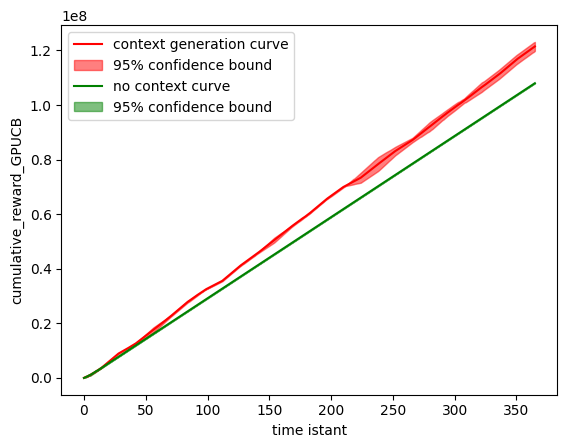

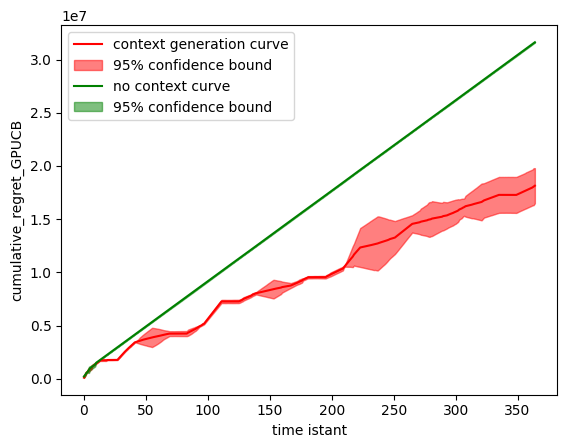

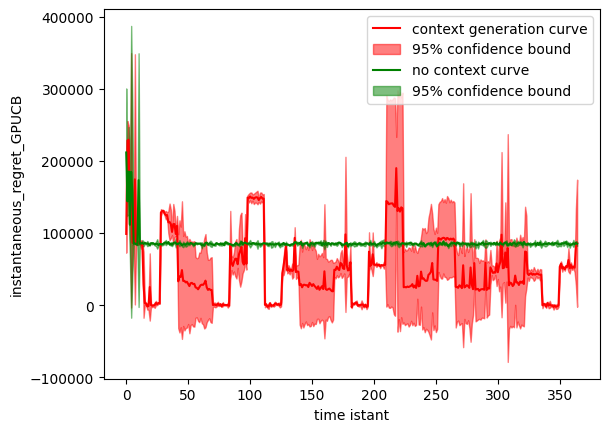

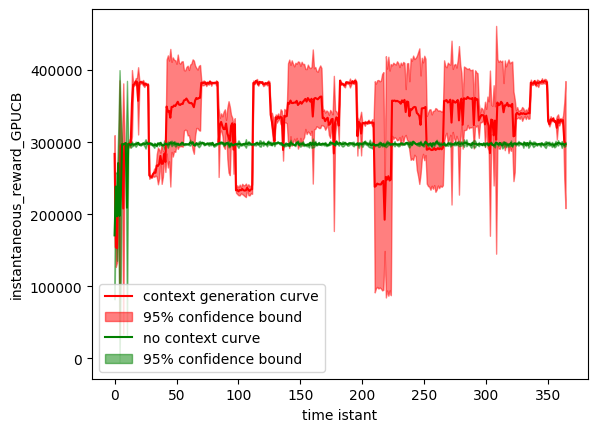

In [5]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_gpucb_multi_gen)
arr2=np.array(cum_reward_gpucb_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "cumulative_reward_GPUCB")

x=[i for i in range(T)]
arr1=np.array(cum_regret_gpucb_multi_gen)
arr2=np.array(cum_regret_gpucb_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "cumulative_regret_GPUCB")

x=[i for i in range(T)]
arr1=np.array(istant_regret_gpucb_multi_gen)
arr2=np.array(istant_regret_gpucb_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "instantaneous_regret_GPUCB")

x=[i for i in range(T)]
arr1=np.array(istant_reward_gpucb_multi_gen)
arr2=np.array(istant_reward_gpucb_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "instantaneous_reward_GPUCB")

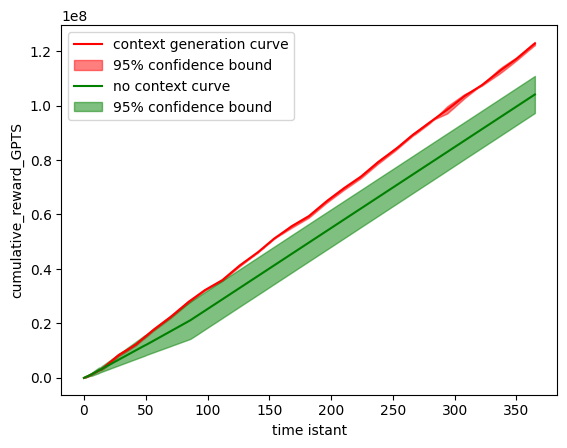

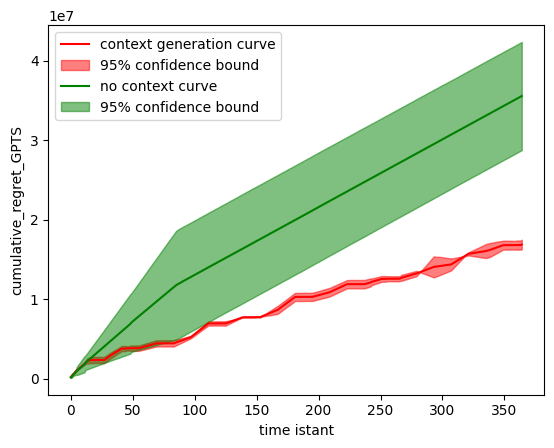

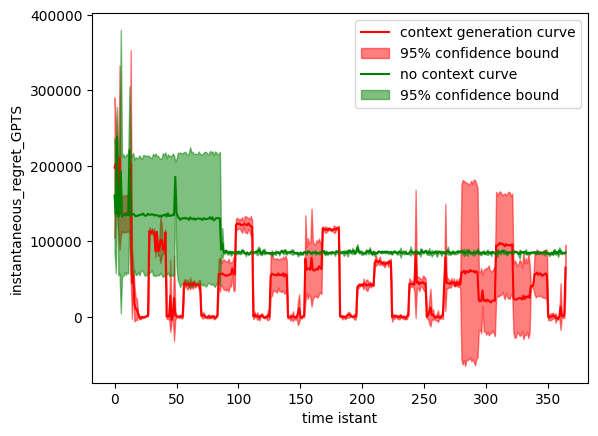

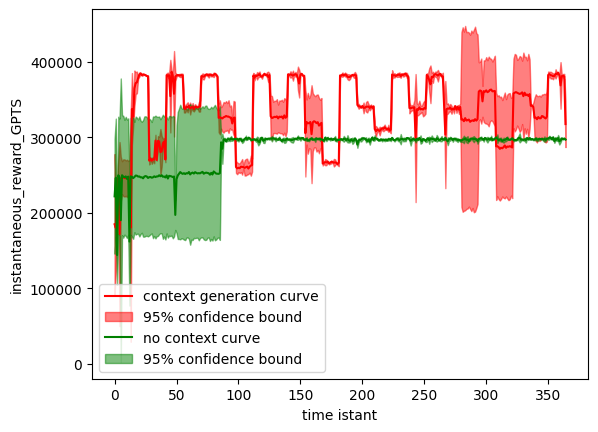

In [7]:
x=[i for i in range(T+1)]
arr1=np.array(cum_reward_gpts_multi_gen)
arr2=np.array(cum_reward_gpts_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "cumulative_reward_GPTS")

x=[i for i in range(T)]
arr1=np.array(cum_regret_gpts_multi_gen)
arr2=np.array(cum_regret_gpts_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "cumulative_regret_GPTS")

x=[i for i in range(T)]
arr1=np.array(istant_regret_gpts_multi_gen)
arr2=np.array(istant_regret_gpts_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "instantaneous_regret_GPTS")

x=[i for i in range(T)]
arr1=np.array(istant_reward_gpts_multi_gen)
arr2=np.array(istant_reward_gpts_multi)
p.plot_comparison(x, arr1, arr2, "context generation curve", "no context curve", "instantaneous_reward_GPTS")

In [9]:
csv_file1 = "cumulative_reward_gpucb_ts_gen.csv"
csv_file2 = "cumulative_regret_gpucb_ts_gen.csv"
csv_file3 = "instantaneous_reward_gpucb_ts_gen.csv"
csv_file4 = "instantaneous_regret_gpucb_ts_gen.csv"


# Open the CSV file in write mode
with open(csv_file1, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_reward_gpucb_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file1}")

# Open the CSV file in write mode
with open(csv_file2, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_regret_gpucb_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file2}")

# Open the CSV file in write mode
with open(csv_file3, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_reward_gpucb_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file3}")

# Open the CSV file in write mode
with open(csv_file4, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_regret_gpucb_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file4}")



csv_file1 = "cumulative_reward_gpucb_ts.csv"
csv_file2 = "cumulative_regret_gpucb_ts.csv"
csv_file3 = "instantaneous_reward_gpucb_ts.csv"
csv_file4 = "instantaneous_regret_gpucb_ts.csv"


# Open the CSV file in write mode
with open(csv_file1, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_reward_gpucb_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file1}")

# Open the CSV file in write mode
with open(csv_file2, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_regret_gpucb_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file2}")

# Open the CSV file in write mode
with open(csv_file3, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_reward_gpucb_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file3}")

# Open the CSV file in write mode
with open(csv_file4, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_regret_gpucb_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file4}")




csv_file1 = "cumulative_reward_gpts_ts_gen.csv"
csv_file2 = "cumulative_regret_gpts_ts_gen.csv"
csv_file3 = "instantaneous_reward_gpts_ts_gen.csv"
csv_file4 = "instantaneous_regret_gpts_ts_gen.csv"

# Open the CSV file in write mode
with open(csv_file1, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_reward_gpts_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file1}")

# Open the CSV file in write mode
with open(csv_file2, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_regret_gpts_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file2}")

# Open the CSV file in write mode
with open(csv_file3, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_reward_gpts_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file3}")

# Open the CSV file in write mode
with open(csv_file4, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_regret_gpts_multi_gen:
        writer.writerow(row)

print(f"Data has been saved to {csv_file4}")


Data has been saved to cumulative_reward_gpucb_ts_gen.csv
Data has been saved to cumulative_regret_gpucb_ts_gen.csv
Data has been saved to instantaneous_reward_gpucb_ts_gen.csv
Data has been saved to instantaneous_regret_gpucb_ts_gen.csv
Data has been saved to cumulative_reward_gpucb_ts.csv
Data has been saved to cumulative_regret_gpucb_ts.csv
Data has been saved to instantaneous_reward_gpucb_ts.csv
Data has been saved to instantaneous_regret_gpucb_ts.csv
Data has been saved to cumulative_reward_gpts_ts_gen.csv
Data has been saved to cumulative_regret_gpts_ts_gen.csv
Data has been saved to instantaneous_reward_gpts_ts_gen.csv
Data has been saved to instantaneous_regret_gpts_ts_gen.csv


In [ ]:
import csv


csv_file1 = "cumulative_reward_gpts_ts.csv"
csv_file2 = "cumulative_regret_gpts_ts.csv"
csv_file3 = "instantaneous_reward_gpts_ts.csv"
csv_file4 = "instantaneous_regret_gpts_ts.csv"

# Open the CSV file in write mode
with open(csv_file1, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_reward_gpts_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file1}")

# Open the CSV file in write mode
with open(csv_file2, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in cum_regret_gpts_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file2}")

# Open the CSV file in write mode
with open(csv_file3, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_reward_gpts_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file3}")

# Open the CSV file in write mode
with open(csv_file4, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each inner list as a row in the CSV file
    for row in istant_regret_gpts_multi:
        writer.writerow(row)

print(f"Data has been saved to {csv_file4}")